<a href="https://colab.research.google.com/github/saketlakhotia17/IBM_MachineLearning/blob/main/3.%20Logistic%20Regression/Exp4_I027_ML(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 4 - Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('data_logistics_1.csv')
df

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1
5,730,1
6,690,1
7,720,1
8,740,1
9,690,1


Defining independent and dependent variable

In [ ]:
x1 = df['gmat']
y1 = df['admitted']

x= np.array(x1)
y=np.array(y1)

In [ ]:
x

array([780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710,
       680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670,
       660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590,
       690])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
x = x.reshape((-1,1))
x.shape

(40, 1)

In [ ]:
y = y.reshape((-1,1))
y.shape

(40, 1)

Step 1 - Create linear regression Model

In [ ]:
# For Linear Regression 
# x can have values from -infinity to +infinity 
# y can have values from -infinity to +infinity 
model= LinearRegression()
model.fit(x,y)
b1 = model.coef_
b0 = model.intercept_
yhat = b0 + (b1*x)

In [ ]:
# For Logical Regression 
# x(input) can have values from -infinity to +infinity with mean value of 0
# y(output) can have values from 0 to +1

Map Linear Regression Model to Logistic Regression Model

In [ ]:
z = yhat - np.mean(yhat)

# Compute output (sig) of Logistic Regression Model
# Use sigmoid function regression

sig = 1/(1 + np.exp(-z))
sh = sig.shape
sh

(40, 1)

In [ ]:
output = np.zeros((sh[0],1))
for i in range (0, sh[0]):
  if sig[i]>0.5:
    output[i]=1
  else:
    output[i]=0

print("Predicted Output: \n", output, '\n')

Predicted Output: 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]] 



In [ ]:
error = 0
for i in range(0,sh[0]):
  if y[i]!=output[i]:
    error = error+1

error

1

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('data_logistics.csv')
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


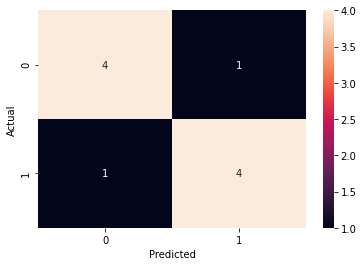

In [ ]:
x = df[['gmat','gpa','work_experience']]
y = df['admitted']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot = True)

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is ", acc)


Accuracy is  0.8


Conclusion

1. For the given dataset with 1 indepenedent variable and 1 dependent variable, Linear Regresssion is used to create a model. This model is mapped to logistic Regression model using sigmoid function. It is found that trained model shows 1 error in 40 samples.

2. for the given dataset of 3 indepenedent variable and 1 dependent variable, logistic regresssion model is used, Trained model is tested for 25% of samples. It is found that the trained model is 80% accurate.